In [3]:
import pandas as pd
import re as regex
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#County Employment and Wages in Wisconsin — Third Quarter 2023
#https://www.bls.gov/regions/midwest/news-release/countyemploymentandwages_wisconsin.htm
empD = pd.read_csv(r'C:\Users\taqiu\OneDrive\dataForSQL\WI_County.csv', encoding = 'ISO-8859-1')

#https://www.dhs.wisconsin.gov/aboutdhs/regions.htm region informaiton for Wisconsin Counties 
regD = pd.read_csv(r'C:\Users\taqiu\OneDrive\dataForSQL\WI_County_Reg.csv')

In [5]:
empD = empD.rename( columns= {'Area' : 'County'})
#prepare to combine the two DataFrames by changing the column names to match 

In [6]:
empD = empD.merge(regD)
#comibined both data froms

In [7]:
empD['Average weekly wage ($)'] = empD['Average weekly wage ($)'].replace(',','', regex=True)
#remove comma from column before conversion

In [8]:
empD['Average weekly wage ($)'] = (empD['Average weekly wage ($)']).astype(int)
#convert col from string to int

In [15]:
empPlt = empD.groupby('Region')['Average weekly wage ($)'].mean().sort_values(ascending = False).reset_index()
empPlt

,Region,Average weekly wage ($)
0,SE,1066.375000
1,S,957.714286
2,NE,949.411765
3,W,930.777778
4,N,880.600000


Text(0.5, 1.0, 'Wisconsin Average Weekly Wage by Region')

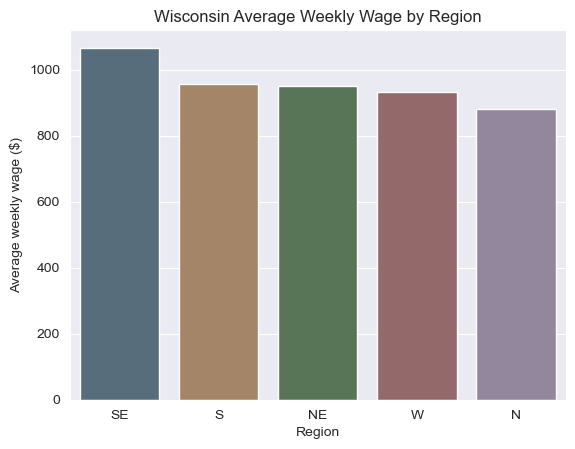

In [17]:
sns.set_style('darkgrid')
sns.barplot(empPlt, x='Region', y='Average weekly wage ($)', saturation=0.25 )
plt.title('Wisconsin Average Weekly Wage by Region')
#plt.plot()
#.sort_values('Average weekly wage ($)', ascending=False, inplace=True )